In [167]:
from astropy.io import fits
from astropy import table
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import numpy as np
import matplotlib.pyplot as plt

In [168]:
catFile = 'Melanie Catalogs/clumpy_stripe82_fullsample.fits'
catFits = fits.open(catFile) 
# catFits.info() 
catTable = table.Table(catFits[1].data)
# print(*catTable.columns, sep='\n')
n = 0
for column in catTable.columns:
    print(n, column,'\n')
    n+=1

0 objid_1 

1 sample_1 

2 asset_id 

3 objid_str 

4 total_count 

5 total_weight 

6 t01_smooth_or_features_a01_smooth_count 

7 t01_smooth_or_features_a01_smooth_weight 

8 t01_smooth_or_features_a01_smooth_fraction 

9 t01_smooth_or_features_a01_smooth_weighted_fraction 

10 t01_smooth_or_features_a02_features_or_disk_count 

11 t01_smooth_or_features_a02_features_or_disk_weight 

12 t01_smooth_or_features_a02_features_or_disk_fraction 

13 t01_smooth_or_features_a02_features_or_disk_weighted_fraction 

14 t01_smooth_or_features_a03_star_or_artifact_count 

15 t01_smooth_or_features_a03_star_or_artifact_weight 

16 t01_smooth_or_features_a03_star_or_artifact_fraction 

17 t01_smooth_or_features_a03_star_or_artifact_weighted_fraction 

18 t01_smooth_or_features_total_count 

19 t01_smooth_or_features_total_weight 

20 t02_edgeon_a04_yes_count 

21 t02_edgeon_a04_yes_weight 

22 t02_edgeon_a04_yes_fraction 

23 t02_edgeon_a04_yes_weighted_fraction 

24 t02_edgeon_a05_no_count 

25 t0

In [199]:
catTable[1]['FIELD']

125

## Spectra from Bulk

In [67]:
for cat in catTable[:5]:
    print(str(cat['RA'])+','+str(cat['DEC']))

315.90303127,-1.22853775
321.63790911,-1.12280623
324.56071869,-0.78378343
309.70230142,-0.22634834
312.71737669,-0.32570262


In [141]:
def genSpectraAQ(file):
    objFits = fits.open(file)
    objTable = table.Table(objFits[1].data)
    plt.figure(figsize=(15,7.5))
    plt.plot(10**objTable['loglam'],objTable['flux'])
    plt.show()
    return objTable

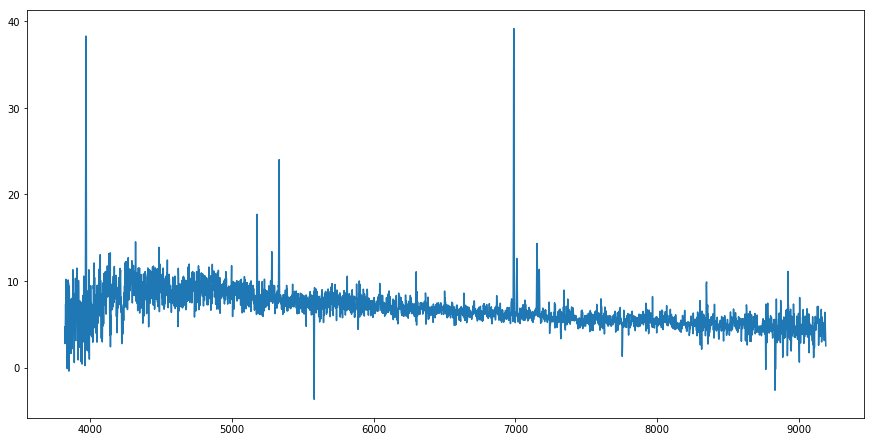

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
float32,float32,float32,int32,int32,float32,float32,float32
4.6897354,3.5821,0.08056473,0,1048576,1.3516879,9.224595,5.1120944
2.7707083,3.5822,0.08150165,0,1048576,1.3514453,8.174298,5.2839675
3.894421,3.5823,0.08513764,0,1048576,1.3512048,7.286706,5.0719986
3.886116,3.5824,0.087916575,0,1048576,1.3509635,6.9048896,5.150409
4.802963,3.5825,0.08962637,0,1048576,1.350719,7.23488,5.380283
5.552115,3.5826,0.085451186,0,0,1.3504835,7.5581408,5.459907
7.332748,3.5827,0.08466281,0,0,1.3502475,7.8086944,5.3148265
5.2759204,3.5828,0.091655135,0,0,1.3500062,7.0249486,5.1172414
4.858766,3.5829,0.09926969,0,0,1.3497682,6.26601,5.074417


In [142]:
genSpectraAQ('spec-0985-52431-0287.fits')

## Testing AstroQuery

In [175]:
test = {'RA':catTable[1]['RA'],'DEC':catTable[1]['DEC']}
pos = coords.SkyCoord(test['RA'],test['DEC'],unit='deg')
xid = SDSS.query_region(pos,spectro=True)
xid

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,bytes4
321.63790960047,-1.1227999503427,1237656567042343485,2583,301,1,125,0.2234196,988,52520,310,1112474362390276096,26,SDSS


In [176]:
sp = SDSS.get_spectra(matches=xid)
spData = sp[0][1].data

In [177]:
sp[0]

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1254fedd8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x124d15d30>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x125f73550>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x129aa0f60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x126d45198>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x126d71ba8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x128a465f8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1293df048>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x128a3dcf8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x12834a470>]

In [178]:
table.Table(spData)

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
float32,float32,float32,int32,int32,float32,float32,float32
1.4737531,3.582,0.08081927,0,0,1.2196691,15.046393,2.434882
2.8559644,3.5821,0.074348405,0,0,1.2195139,12.70545,2.3235502
6.955282,3.5822,0.06709857,0,0,1.2193519,11.1354685,2.3027081
10.694513,3.5823,0.06371395,0,0,1.2191845,11.44012,2.3409283
-0.9387871,3.5824,0.07335584,0,1048576,1.2190137,12.282513,2.4278605
4.7534723,3.5825,0.07536048,0,1048576,1.2188475,12.2973585,2.4519854
5.875955,3.5826,0.086404435,0,0,1.2186865,11.82765,2.3048553
-1.4715956,3.5827,0.105093755,0,1048576,1.2185175,11.641822,2.3654807
-5.152645,3.5828,0.11660864,0,1048576,1.2183614,11.892387,2.5147645


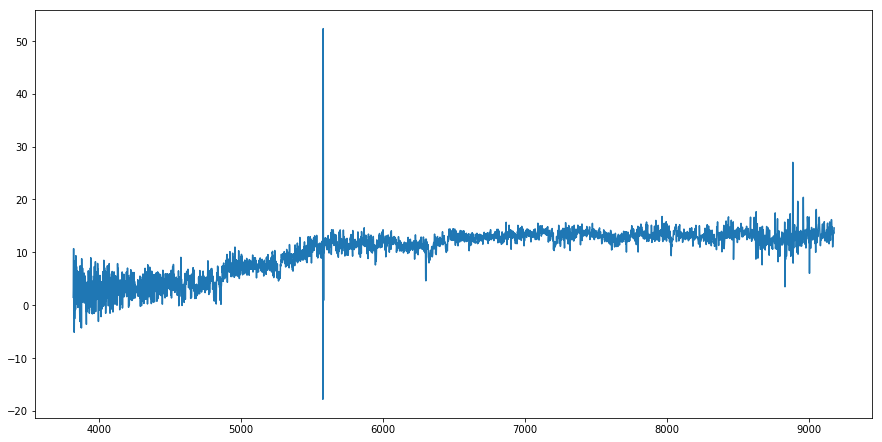

In [180]:
plt.figure(figsize=(15,7.5))
plt.plot(10**spData['loglam'],spData['flux'])
plt.show()

In [217]:
def specPlt(catTable,index,spData):
    plt.figure(figsize=(10,5))
    plt.plot(10**spData['loglam'],spData['flux'])
    plt.title('OBJ: %s, RA: %.3f, DEC: %.3f'%(index,catTable[index]['RA'],catTable[index]['DEC']))
    plt.xlabel("Wavelength [Angstroms]")
    plt.ylabel("Flux [$10^{-17}$ erg/cm$^2$/s/A]")
    plt.tight_layout()
    plt.savefig('spectra imgs/obj_%s.png'%index)
    plt.show()

In [224]:
def genSpectra(catTable,index,pltShow):
    pos = coords.SkyCoord(catTable[index]['RA'],
                          catTable[index]['DEC'], unit='deg')
    xid = SDSS.query_region(pos,spectro=True)
    
    if not xid:
        print('--------\nNo spectra for object %s\n--------'%index)
        return
    sp = SDSS.get_spectra(matches=xid)
    spData = sp[0][1].data
    if pltShow:
        specPlt(catTable,index,spData)
    return xid,table.Table(spData)

In [213]:
from tqdm import tqdm_notebook as tqdm
genBar = tqdm(desc='object',total=len(catTable))
for n in range(0,len(catTable)):
    genSpectra(catTable,n,False)
    genBar.update(1)

--------
No spectra for object 4
--------
--------
No spectra for object 5
--------
--------
No spectra for object 17
--------
--------
No spectra for object 25
--------
--------
No spectra for object 27
--------
--------
No spectra for object 39
--------
--------
No spectra for object 56
--------
--------
No spectra for object 58
--------
--------
No spectra for object 69
--------
--------
No spectra for object 70
--------
--------
No spectra for object 87
--------
--------
No spectra for object 97
--------
--------
No spectra for object 139
--------
--------
No spectra for object 142
--------
--------
No spectra for object 149
--------
--------
No spectra for object 150
--------
--------
No spectra for object 166
--------
--------
No spectra for object 173
--------
--------
No spectra for object 180
--------
--------
No spectra for object 226
--------
--------
No spectra for object 230
--------
--------
No spectra for object 278
--------


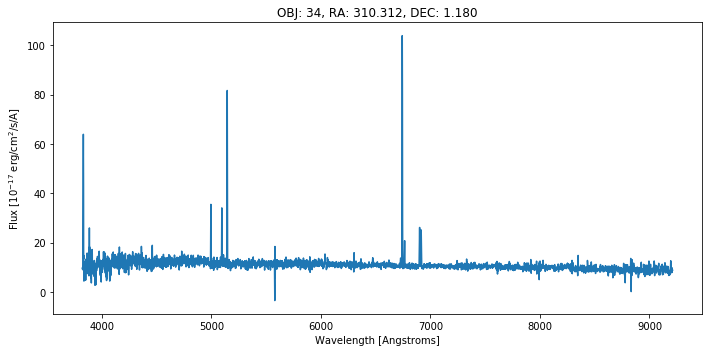

In [225]:
obj34 = genSpectra(catTable,34,True)

In [227]:
obj34[0]

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,bytes4
310.311530645619,1.17984347905548,1237656896140018098,2659,301,6,61,0.02704323,981,52435,599,1104672501331421184,26,SDSS
310.311530645619,1.17984347905548,1237656896140018098,2659,301,6,61,0.02705698,1021,52460,527,1149688706815256576,26,SDSS


In [223]:
catTable[34]

objid_1,sample_1,asset_id,objid_str,total_count,total_weight,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_count,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_count,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_fraction,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_total_count,t01_smooth_or_features_total_weight,t02_edgeon_a04_yes_count,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_fraction,t02_edgeon_a04_yes_weighted_fraction,t02_edgeon_a05_no_count,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_fraction,t02_edgeon_a05_no_weighted_fraction,t02_edgeon_total_count,t02_edgeon_total_weight,t03_bar_a06_bar_count,t03_bar_a06_bar_weight,t03_bar_a06_bar_fraction,t03_bar_a06_bar_weighted_fraction,t03_bar_a07_no_bar_count,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_fraction,t03_bar_a07_no_bar_weighted_fraction,t03_bar_total_count,t03_bar_total_weight,t04_spiral_a08_spiral_count,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_fraction,t04_spiral_a08_spiral_weighted_fraction,t04_spiral_a09_no_spiral_count,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_fraction,t04_spiral_a09_no_spiral_weighted_fraction,t04_spiral_total_count,t04_spiral_total_weight,t05_bulge_prominence_a10_no_bulge_count,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_fraction,t05_bulge_prominence_a10_no_bulge_weighted_fraction,t05_bulge_prominence_a11_just_noticeable_count,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_fraction,t05_bulge_prominence_a11_just_noticeable_weighted_fraction,t05_bulge_prominence_a12_obvious_count,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_fraction,t05_bulge_prominence_a12_obvious_weighted_fraction,t05_bulge_prominence_a13_dominant_count,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_fraction,t05_bulge_prominence_a13_dominant_weighted_fraction,t05_bulge_prominence_total_count,t05_bulge_prominence_total_weight,t06_odd_a14_yes_count,t06_odd_a14_yes_weight,t06_odd_a14_yes_fraction,t06_odd_a14_yes_weighted_fraction,t06_odd_a15_no_count,t06_odd_a15_no_weight,t06_odd_a15_no_fraction,t06_odd_a15_no_weighted_fraction,t06_odd_total_count,t06_odd_total_weight,t07_rounded_a16_completely_round_count,t07_rounded_a16_completely_round_weight,t07_rounded_a16_completely_round_fraction,t07_rounded_a16_completely_round_weighted_fraction,t07_rounded_a17_in_between_count,t07_rounded_a17_in_between_weight,t07_rounded_a17_in_between_fraction,t07_rounded_a17_in_between_weighted_fraction,t07_rounded_a18_cigar_shaped_count,t07_rounded_a18_cigar_shaped_weight,t07_rounded_a18_cigar_shaped_fraction,t07_rounded_a18_cigar_shaped_weighted_fraction,t07_rounded_total_count,t07_rounded_total_weight,t08_odd_feature_a19_ring_count,t08_odd_feature_a19_ring_weight,t08_odd_feature_a19_ring_fraction,t08_odd_feature_a19_ring_weighted_fraction,t08_odd_feature_a20_lens_or_arc_count,t08_odd_feature_a20_lens_or_arc_weight,t08_odd_feature_a20_lens_or_arc_fraction,t08_odd_feature_a20_lens_or_arc_weighted_fraction,t08_odd_feature_a21_disturbed_count,t08_odd_feature_a21_disturbed_weight,t08_odd_feature_a21_disturbed_fraction,t08_odd_feature_a21_disturbed_weighted_fraction,t08_odd_feature_a22_irregular_count,t08_odd_feature_a22_irregular_weight,t08_odd_feature_a22_irregular_fraction,t08_odd_feature_a22_irregular_weighted_fraction,t08_odd_feature_a23_other_count,t08_odd_feature_a23_other_weight,t08_odd_feature_a23_other_fraction,t08_odd_feature_a23_other_weighted_fraction,t08_odd_feature_a24_merger_count,t08_odd_feature_a24_merger_weight,t08_o

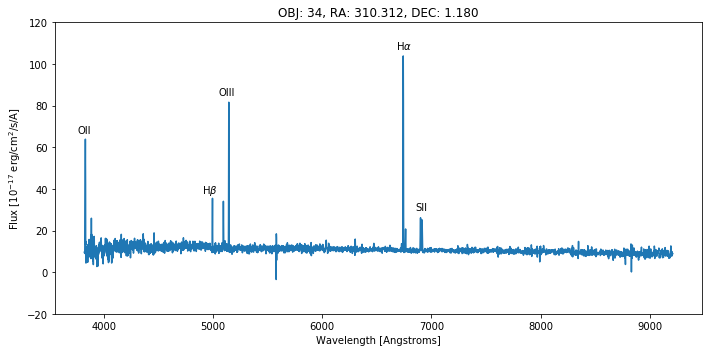

In [282]:
plt.figure(figsize=(10,5))
plt.plot(10**obj34[1]['loglam'],obj34[1]['flux'])
plt.title('OBJ: %s, RA: %.3f, DEC: %.3f'%(34,catTable[34]['RA'],catTable[34]['DEC']))
plt.xlabel("Wavelength [Angstroms]")
plt.ylabel("Flux [$10^{-17}$ erg/cm$^2$/s/A]")
plt.ylim(-20,120)
# plt.xlim(6800,7000)
plt.text(6680,107,r'H$\alpha$')
plt.text(6850,30,'SII')
plt.text(5050,85,'OIII')
plt.text(4900,38,r'H$\beta$')
plt.text(3760,67,'OII')
plt.tight_layout()
plt.savefig('spectra imgs/label_obj_%s.png'%34)
plt.show()

## Playing with `ppxf`

In [283]:
from ppxf.ppxf import ppxf